
## House Price Prediction 


dataset available at: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

### Loading data

In [37]:
import pandas as pd
import numpy as np

In [38]:
column_names = ['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','price']
dataset = pd.read_csv('housing.csv',header=None, delimiter=r"\s+", names=column_names)
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Data exploration

In [39]:
# checking the data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [40]:
# checking for null values
dataset.isnull().sum().sum()

0

In [41]:
# statistical information
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

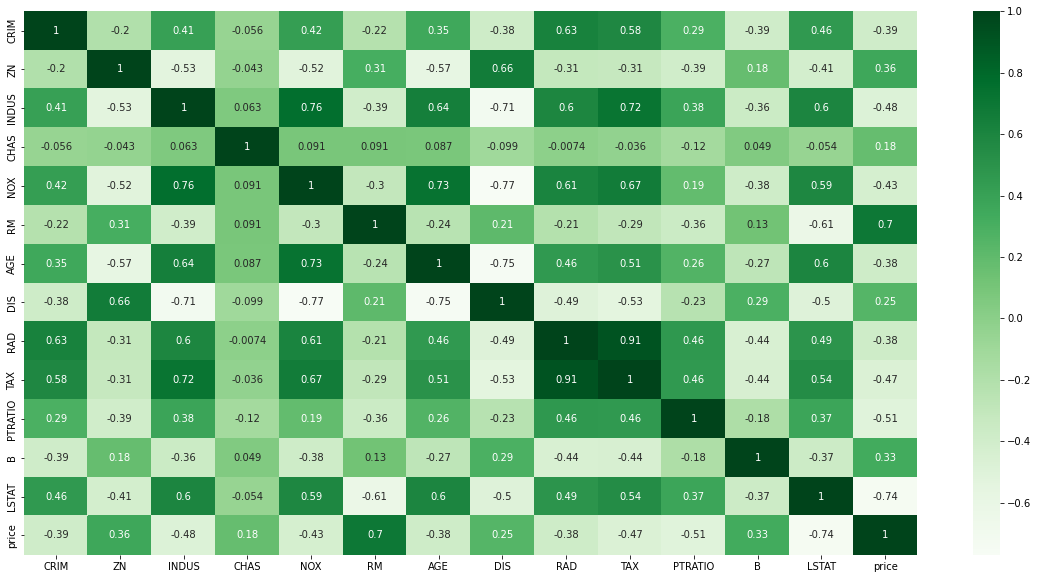

In [43]:
# correlation between various features in the dataset || To get more information about the dataset
corr = dataset.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='Greens')

In [44]:
# splitting data into x and y
X = dataset.drop(['price'], axis=1)
Y = dataset['price']

In [45]:
# Splitting the data into Training data and Test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

### Modelling and training

In [46]:
# since we have a small amount of data we will use XGBRegressor which is a supervised machine learning model that will work well in
# this case
from xgboost import XGBRegressor

In [47]:
model = XGBRegressor(verbosity = 0) # loading the model
model.fit(X_train, Y_train) # training the model with X_train

XGBRegressor(verbosity=0)

### Evaluation
**Note:** since this is a regression problem we can't calculate accuracy score, therefore we will check for both R squared error and Mean Absolute Error

In [48]:
from sklearn import metrics

In [49]:
ypred = model.predict(X_train)

In [50]:
# R squared error
score_1 = metrics.r2_score(Y_train, ypred)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, ypred)
print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9733349094832763
Mean Absolute Error :  1.145314053261634
